Matplotlib is building the font cache; this may take a moment.


|--- AssetType_FX <= 0.50
|   |--- BuyCurrency_USD <= 0.50
|   |   |--- BuyCurrency_JPY <= 0.50
|   |   |   |--- class: Rates
|   |   |--- BuyCurrency_JPY >  0.50
|   |   |   |--- class: Credits
|   |--- BuyCurrency_USD >  0.50
|   |   |--- class: Equity
|--- AssetType_FX >  0.50
|   |--- class: FX



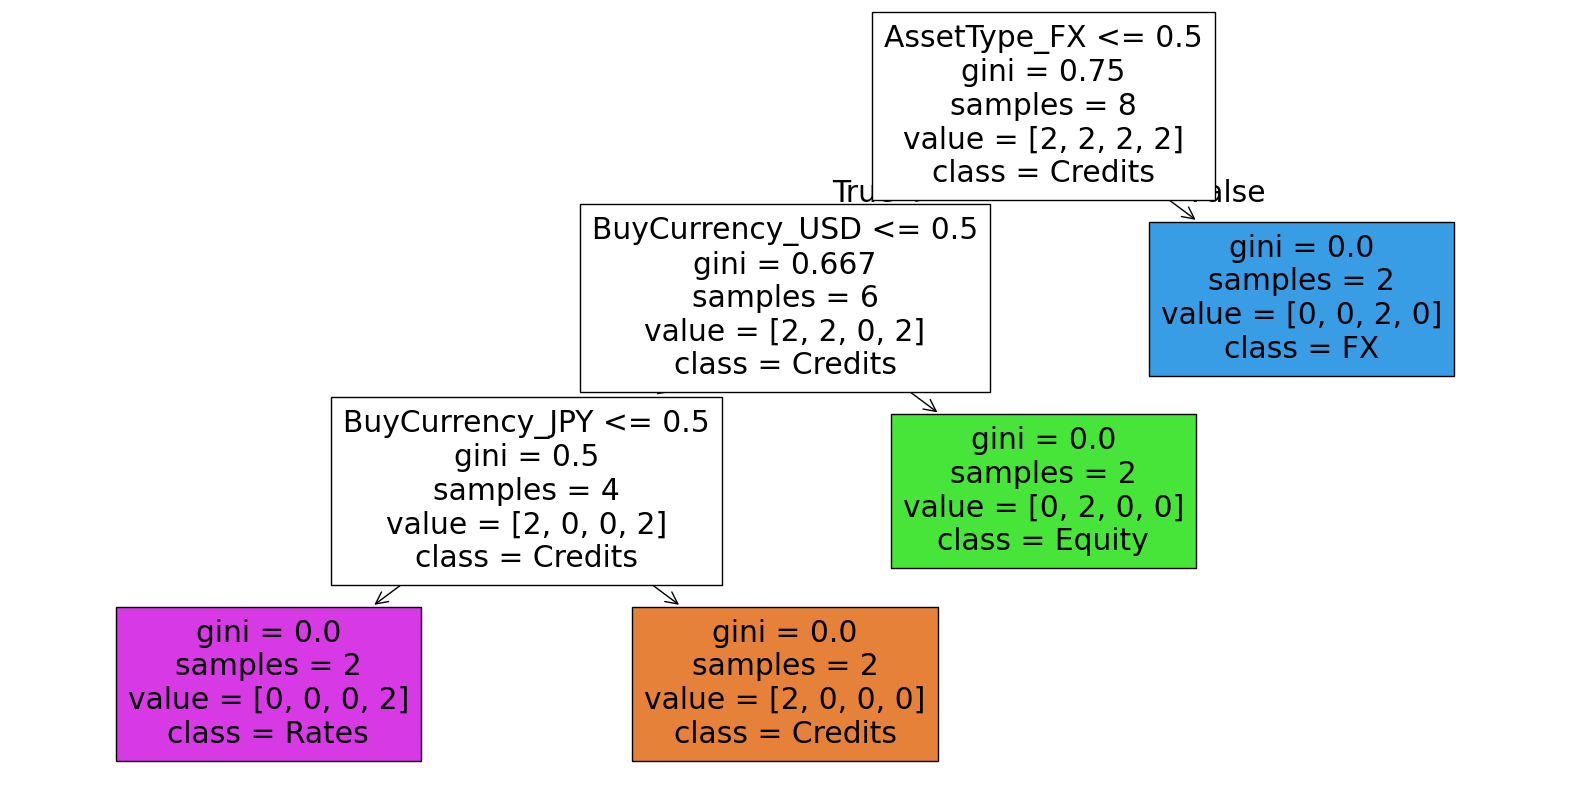

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import tree

# Example dataset creation
data = {
    'AssetType': ['Equity', 'Rates', 'Credits', 'FX', 'Equity', 'Rates', 'Credits', 'FX'],
    'BuyCurrency': ['USD', 'EUR', 'JPY', 'GBP', 'USD', 'EUR', 'JPY', 'GBP'],
    'SellCurrency': ['EUR', 'USD', 'USD', 'USD', 'JPY', 'GBP', 'EUR', 'USD'],
    'Days': [1, 2, 3, 4, 1, 2, 3, 4],
    'PFE': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

# Create DataFrame
df = pd.DataFrame(data)

# One-hot encode the categorical features
categorical_features = ['AssetType', 'BuyCurrency', 'SellCurrency']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = onehot_encoder.fit_transform(df[categorical_features])
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Combine all features
final_features_df = pd.concat([df[['Days', 'PFE']], encoded_df], axis=1)

# Define features and target
X = final_features_df
y = df['AssetType']

# Train a Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5)
tree_model.fit(X, y)

# Export the tree as text
tree_rules = export_text(tree_model, feature_names=final_features_df.columns.to_list())
print(tree_rules)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, feature_names=final_features_df.columns, class_names=tree_model.classes_, filled=True)
plt.show()
